<a href="https://colab.research.google.com/github/2yeeji/IMEN321/blob/main/%5B%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A7%88%EC%9D%B4%EB%8B%9D%5D%5BTerm_Project%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/데이터마이닝/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/데이터마이닝


## 데이터셋 탐색

In [ ]:
import pandas as pd

diabetes = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

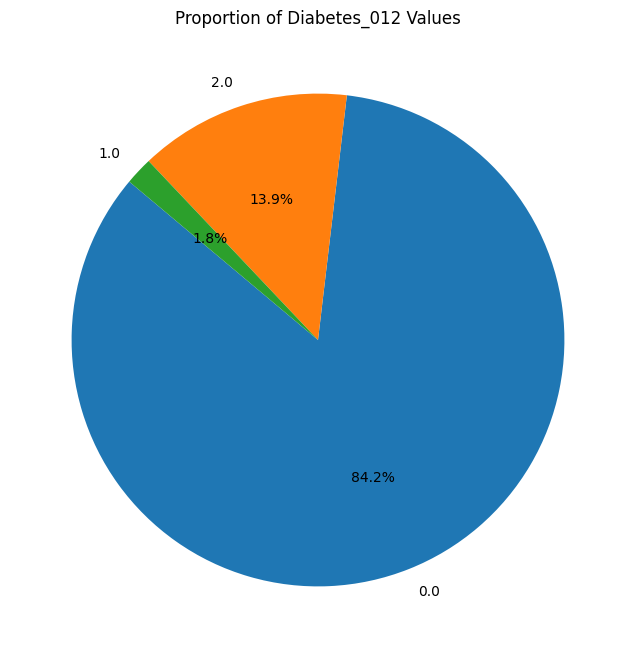

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

value_counts = diabetes['Diabetes_012'].value_counts(normalize=True)

plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Diabetes_012 Values')
plt.show()

In [ ]:
selected_columns = diabetes.iloc[:, [4, 14, 15, 16, 19, 20, 21]]
summary_statistics = selected_columns.describe()

summary_statistics

,BMI,GenHlth,MentHlth,PhysHlth,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,28.382364,2.511392,3.184772,4.242081,8.032119,5.050434,6.053875
std,6.608694,1.068477,7.412847,8.717951,3.054220,0.985774,2.071148
min,12.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,24.000000,2.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,27.000000,2.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,31.000000,3.000000,2.000000,3.000000,10.000000,6.000000,8.000000
max,98.000000,5.000000,30.000000,30.000000,13.000000,6.000000,8.000000


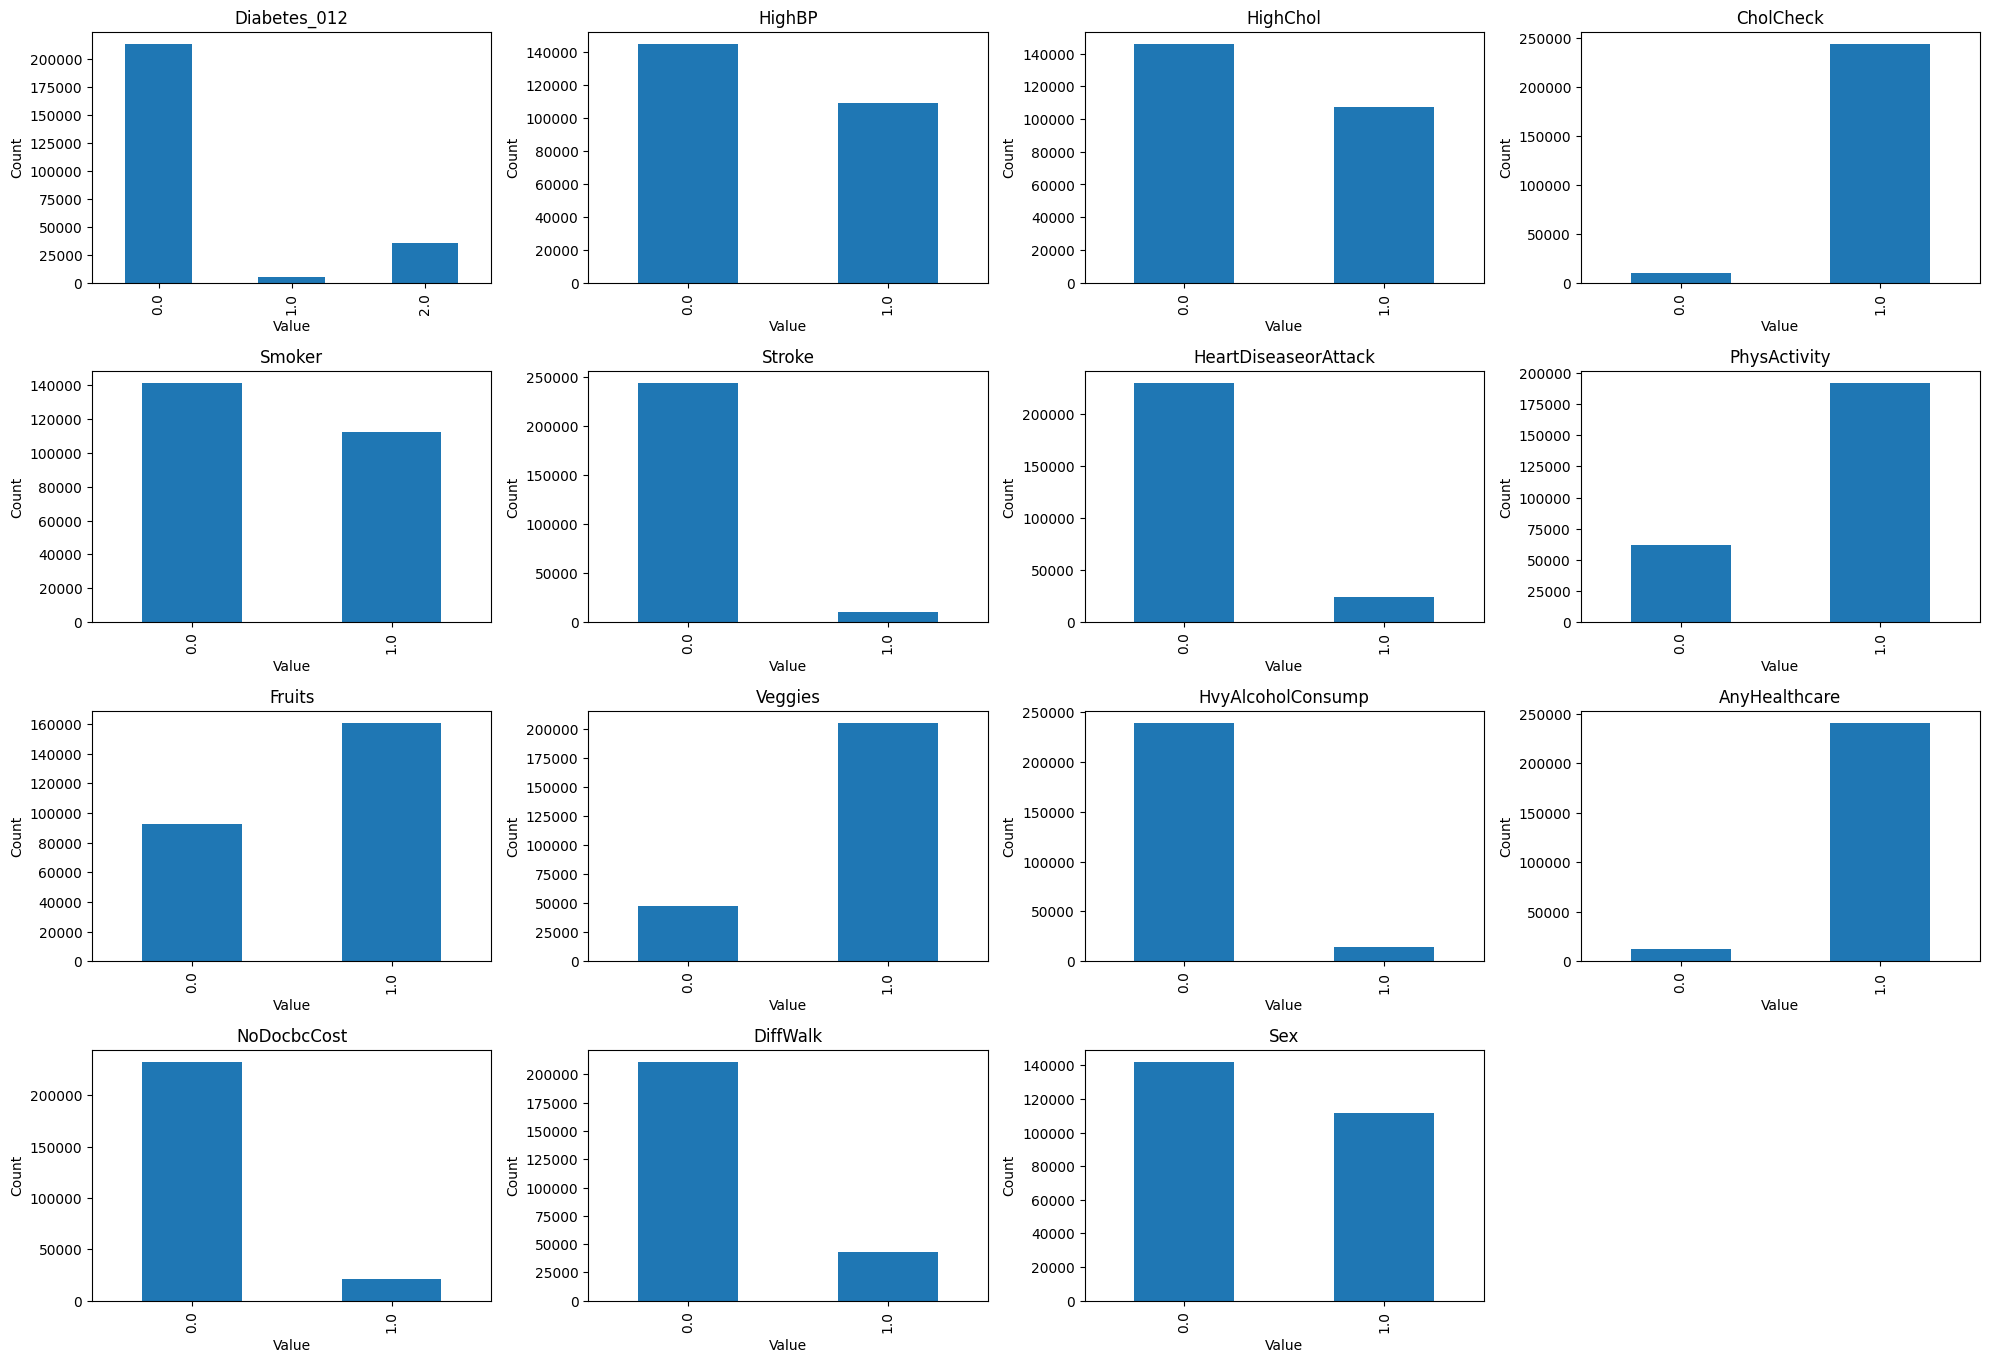

In [ ]:
import matplotlib.pyplot as plt

exclude_indices = [4, 14, 15, 16, 19, 20, 21]
bar_indices = [i for i in range(len(diabetes.columns)) if i not in exclude_indices]

nrows, ncols = 6, 4
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 20))
axes = axes.flatten()

for i, idx in enumerate(bar_indices):
    diabetes[diabetes.columns[idx]].value_counts().sort_index().plot(kind='bar', ax=axes[i])
    axes[i].set_title(diabetes.columns[idx])
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Count')

for j in range(len(bar_indices), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

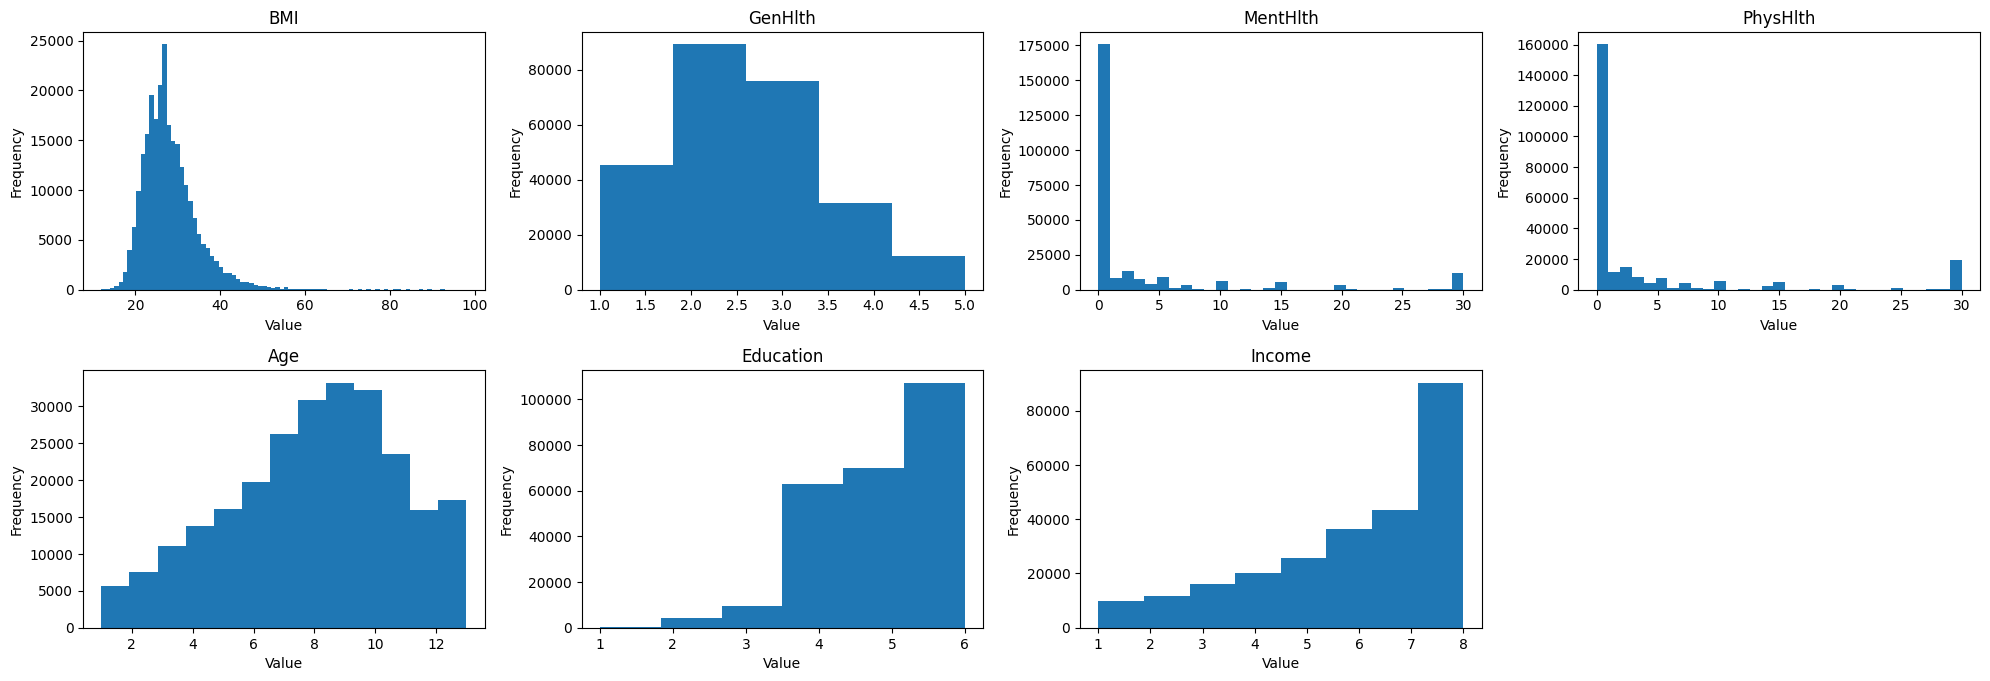

In [ ]:
import matplotlib.pyplot as plt

exclude_indices = [4, 14, 15, 16, 19, 20, 21]
hist_indices = exclude_indices

nrows, ncols = 6, 4
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 20))
axes = axes.flatten()

for i, idx in enumerate(hist_indices):
    unique_values = diabetes[diabetes.columns[idx]].nunique()
    diabetes[diabetes.columns[idx]].plot(kind='hist', ax=axes[i], bins=unique_values)
    axes[i].set_title(diabetes.columns[idx])
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

for j in range(len(hist_indices), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

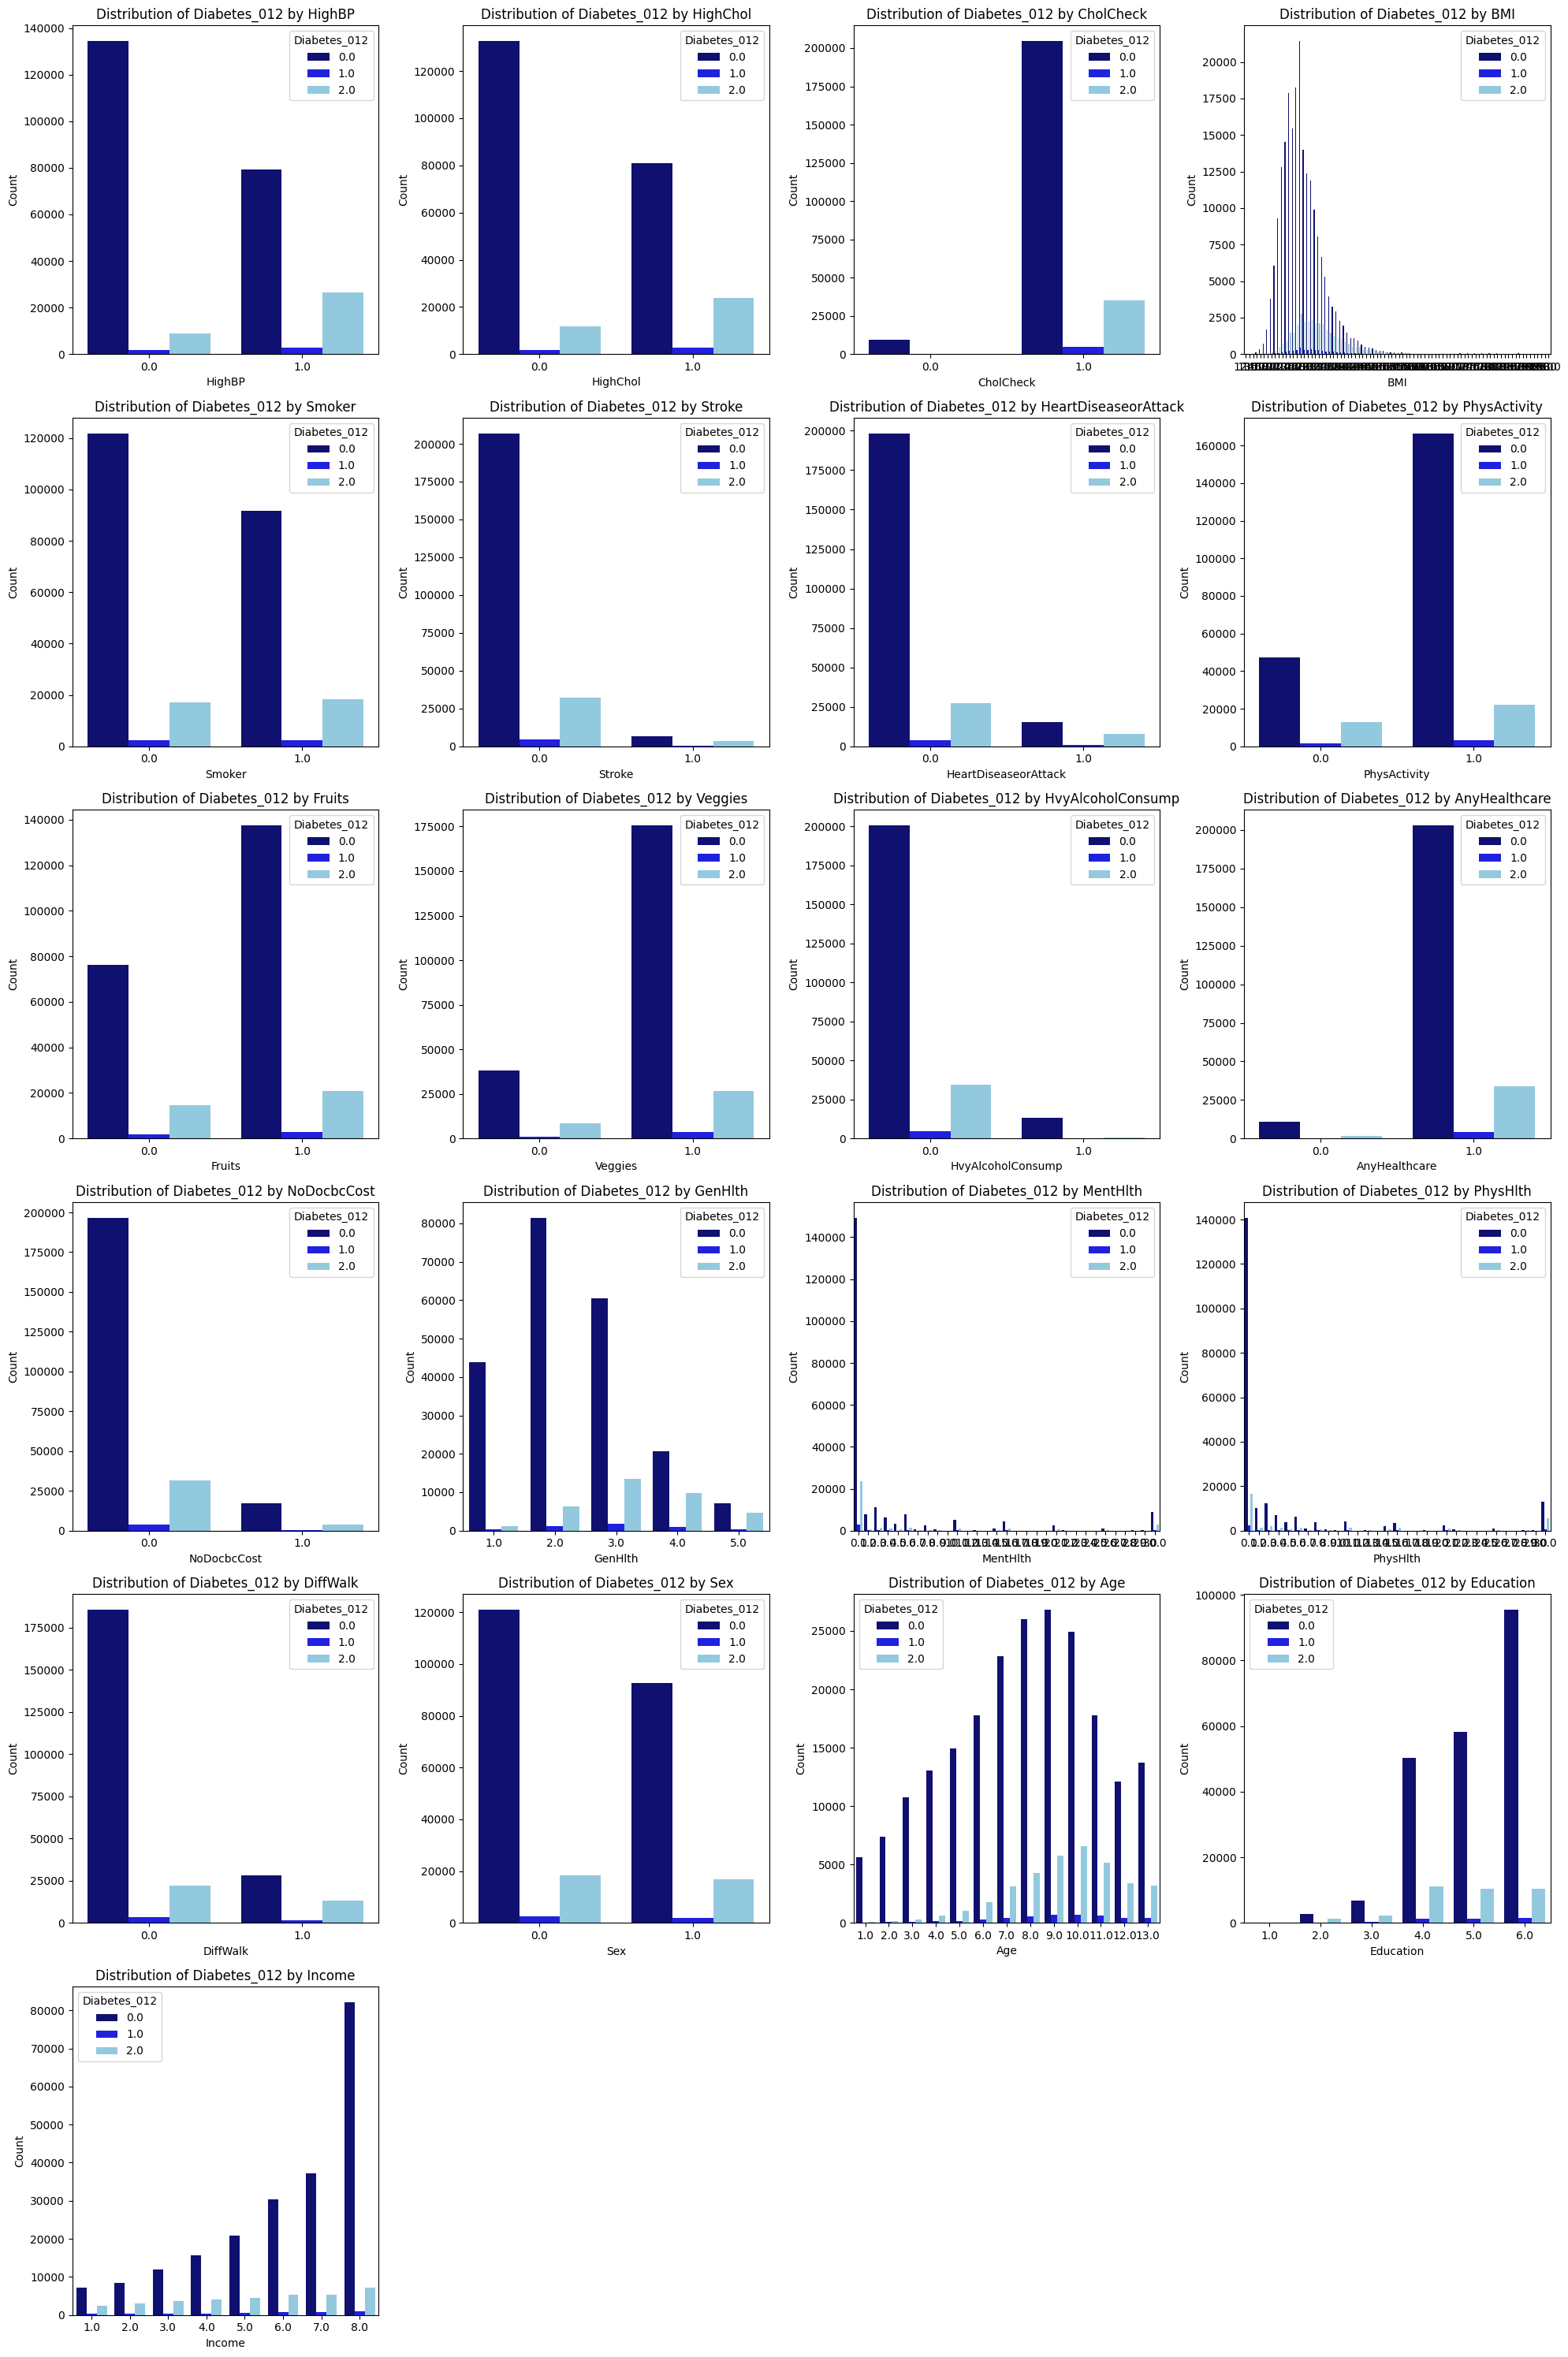

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_plot = [col for col in diabetes.columns if col != 'Diabetes_012']

n_cols = 4
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()

custom_palette = {0: 'navy', 1: 'blue', 2: 'skyblue'}

for i, col in enumerate(columns_to_plot):
    sns.countplot(data=diabetes, x=col, hue='Diabetes_012', ax=axes[i], palette=custom_palette)
    axes[i].set_title(f'Distribution of Diabetes_012 by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


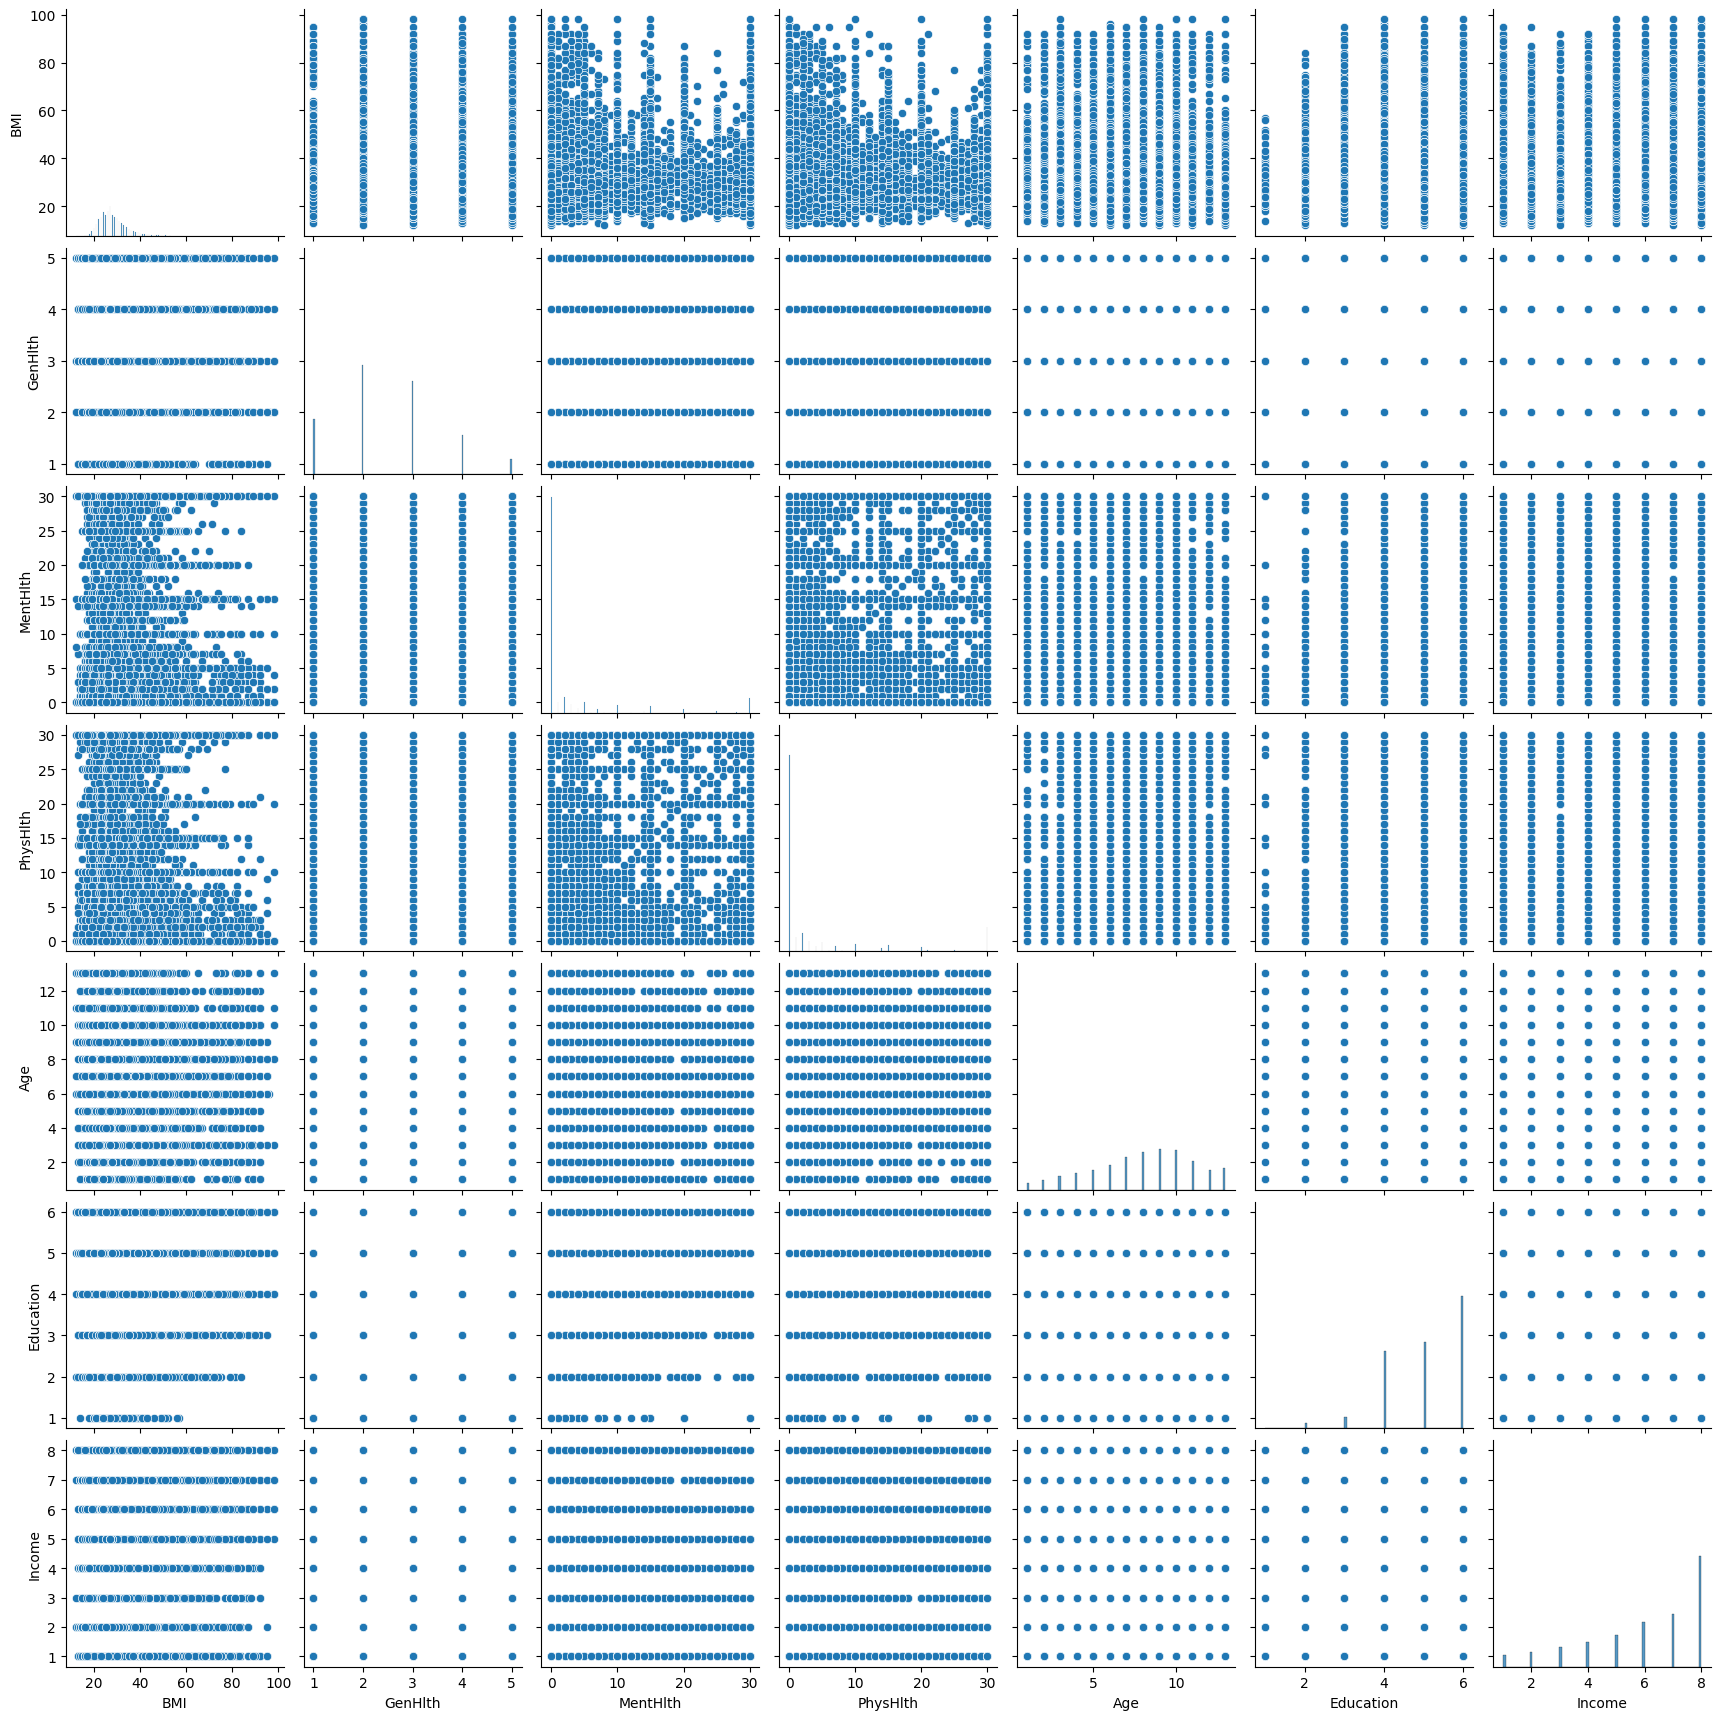

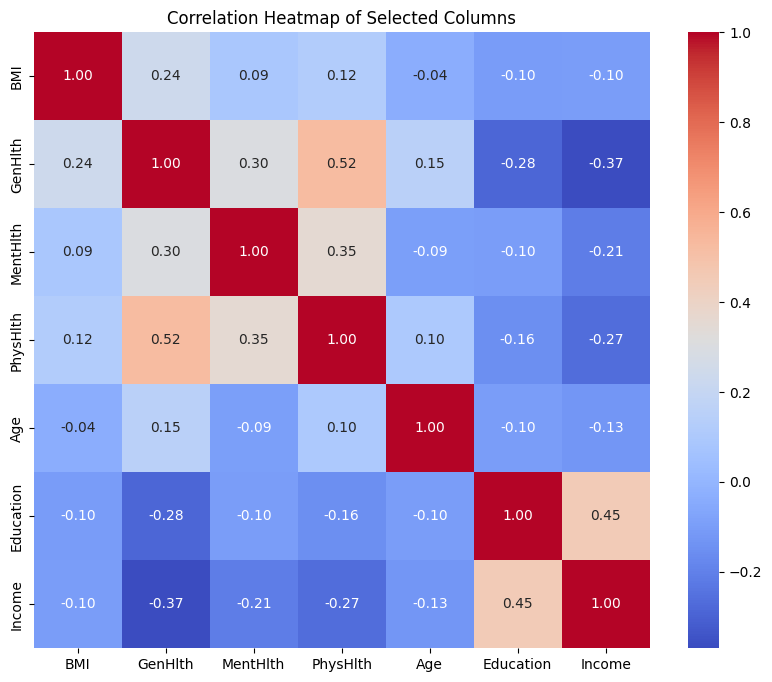

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

columns_of_interest = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']
df_selected = diabetes[columns_of_interest]

sns.pairplot(df_selected)
plt.show()

correlation_matrix = df_selected.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap of Selected Columns')
plt.show()

## 데이터셋 생성

In [ ]:
from sklearn.preprocessing import RobustScaler

y = diabetes['Diabetes_012']
X = diabetes.drop(['Diabetes_012'], axis=1)

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

X_oversampled, y_oversampled = RandomOverSampler(random_state=12345).fit_resample(X_scaled, y)
X_smotesampled, y_smotesampled = SMOTE(random_state=12345).fit_resample(X_scaled, y)

print(y_oversampled.value_counts())
print(y_smotesampled.value_counts())

Diabetes_012
0.0    213703
2.0    213703
1.0    213703
Name: count, dtype: int64
Diabetes_012
0.0    213703
2.0    213703
1.0    213703
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

def split_data(X, y, train_size=8000, val_size=2000, test_size=2000, random_state=12345):

    X_trn, X_temp, y_trn, y_temp = train_test_split(X, y, train_size=train_size, test_size=val_size+test_size, random_state=random_state, stratify=y)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test_size, random_state=random_state, stratify=y_temp)

    return X_trn, X_val, X_test, y_trn, y_val, y_test

In [ ]:
X_trn_data, X_val_data, X_test_data, y_trn_data, y_val_data, y_test_data = split_data(X_scaled, y, random_state=0)
X_trn_over, X_val_over, X_test_over, y_trn_over, y_val_over, y_test_over = split_data(X_oversampled, y_oversampled, random_state=0)
X_trn_smote, X_val_smote, X_test_smote, y_trn_smote, y_val_smote, y_test_smote = split_data(X_smotesampled, y_smotesampled, random_state=0)

## 모델 학습

### Multinomial Logistic Regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, confusion_matrix
import scipy.stats as st


def evaluate_model(model, X, y, random_states=[1, 12, 123, 1234, 12345]):
    results = []

    for random_state in random_states:
        X_trn_data, X_val_data, X_test_data, y_trn_data, y_val_data, y_test_data = split_data(X, y, random_state=random_state)

        model.fit(X_trn_data, y_trn_data)
        y_val_pred = model.predict(X_val_data)
        f1 = f1_score(y_val_data, y_val_pred, average='macro')

        cm = confusion_matrix(y_val_data, y_val_pred)

        results.append({
            'random_state': random_state,
            'model': model,
            'f1_score': f1,
            'confusion_matrix': cm,
        })

    f1_scores = [result['f1_score'] for result in results]
    f1_mean = np.mean(f1_scores)
    f1_std = np.std(f1_scores)
    confidence_interval = st.t.interval(0.95, len(f1_scores)-1, loc=f1_mean, scale=st.sem(f1_scores))

    print(f"F1-measure mean: {f1_mean:.4f}")
    print(f"F1-measure std: {f1_std:.4f}")
    print(f"95% confidence interval for F1-measure: [{confidence_interval[0]:.4f}, {confidence_interval[1]:.4f}]")

    for result in results:
        print(f"\nRandom State: {result['random_state']}, F1 Score: {result['f1_score']:.4f}")
        print(f"Confusion Matrix:\n{result['confusion_matrix']}")

    return results

In [ ]:
from sklearn.linear_model import LogisticRegression

model1_1 = LogisticRegression(multi_class='multinomial', solver='newton-cg')
results1_1 = evaluate_model(model1_1, X_scaled, y)

F1-measure mean: 0.3910
F1-measure std: 0.0139
95% confidence interval for F1-measure: [0.3718, 0.4103]

Random State: 1, F1 Score: 0.3729
Confusion Matrix:
[[1626    0   59]
 [  36    0    1]
 [ 238    0   40]]

Random State: 12, F1 Score: 0.4122
Confusion Matrix:
[[1632    0   53]
 [  33    0    4]
 [ 214    0   64]]

Random State: 123, F1 Score: 0.3789
Confusion Matrix:
[[1631    0   54]
 [  33    0    3]
 [ 236    0   43]]

Random State: 1234, F1 Score: 0.3955
Confusion Matrix:
[[1645    0   40]
 [  36    0    1]
 [ 228    0   50]]

Random State: 12345, F1 Score: 0.3956
Confusion Matrix:
[[1646    0   39]
 [  35    0    1]
 [ 229    0   50]]


In [ ]:
model1_2 = LogisticRegression(multi_class='multinomial', solver='newton-cg')
results1_2 = evaluate_model(model1_2, X_oversampled, y_oversampled)

F1-measure mean: 0.5100
F1-measure std: 0.0131
95% confidence interval for F1-measure: [0.4918, 0.5282]

Random State: 1, F1 Score: 0.5140
Confusion Matrix:
[[440 112 115]
 [192 213 262]
 [121 150 395]]

Random State: 12, F1 Score: 0.5104
Confusion Matrix:
[[443  89 135]
 [177 204 285]
 [120 151 396]]

Random State: 123, F1 Score: 0.5034
Confusion Matrix:
[[454 115  97]
 [216 208 243]
 [137 164 366]]

Random State: 1234, F1 Score: 0.4911
Confusion Matrix:
[[429 127 111]
 [198 192 276]
 [125 159 383]]

Random State: 12345, F1 Score: 0.5311
Confusion Matrix:
[[474 100  92]
 [178 225 264]
 [121 163 383]]


In [ ]:
model1_3 = LogisticRegression(multi_class='multinomial', solver='newton-cg')
results1_3 = evaluate_model(model1_3, X_smotesampled, y_smotesampled)

F1-measure mean: 0.5224
F1-measure std: 0.0099
95% confidence interval for F1-measure: [0.5086, 0.5362]

Random State: 1, F1 Score: 0.5115
Confusion Matrix:
[[422 132 113]
 [179 234 254]
 [112 176 378]]

Random State: 12, F1 Score: 0.5246
Confusion Matrix:
[[435 112 120]
 [175 224 267]
 [105 155 407]]

Random State: 123, F1 Score: 0.5323
Confusion Matrix:
[[448 122  96]
 [180 238 249]
 [103 172 392]]

Random State: 1234, F1 Score: 0.5101
Confusion Matrix:
[[423 149  95]
 [196 223 247]
 [105 175 387]]

Random State: 12345, F1 Score: 0.5334
Confusion Matrix:
[[478  94  94]
 [159 224 284]
 [125 157 385]]


### Classification and Regression Tree (CART)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=12345)
clf = clf.fit(X_trn_data, y_trn_data)

print(clf.get_depth())
print(clf.get_n_leaves())

26
1459


In [ ]:
from sklearn.metrics import f1_score
from sklearn.model_selection import ParameterGrid

def grid_search_best_model(model_class, param_grid, X_trn, y_trn, X_val, y_val, scoring='f1_macro'):
    best_score = 0
    best_model = None

    for params in ParameterGrid(param_grid):
        model = model_class(**params, random_state=12345)
        model.fit(X_trn, y_trn)
        y_val_pred = model.predict(X_val)

        if scoring == 'f1_macro':
            score = f1_score(y_val, y_val_pred, average='macro')
        else:
            raise ValueError(f"Unsupported scoring method: {scoring}")

        if score > best_score:
            best_score = score
            best_model = model

    return best_model, best_score

In [ ]:
from sklearn.tree import DecisionTreeClassifier

criterion = ["gini", "entropy"]
max_depth = [10, 20, None]
min_samples_leaf = [5, 10, 20]

param_grid = {
    'criterion': criterion,
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf
}

best_CART, best_f1_score = grid_search_best_model(DecisionTreeClassifier, param_grid, X_trn_data, y_trn_data, X_val_data, y_val_data)

print("Best Hyperparameter: ", best_CART.get_params())
print("Best F1 Score: ", best_f1_score)
print("Tree Depth: ", best_CART.get_depth())
print("Number of Leaves: ", best_CART.get_n_leaves())

model2_1 = DecisionTreeClassifier(**best_CART.get_params())
results2_1 = evaluate_model(model2_1, X_scaled, y)

Best Hyperparameter:  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 20, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 5, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 12345, 'splitter': 'best'}
Best F1 Score:  0.41263417291644394
Tree Depth:  20
Number of Leaves:  693
F1-measure mean: 0.4003
F1-measure std: 0.0060
95% confidence interval for F1-measure: [0.3919, 0.4087]

Random State: 1, F1 Score: 0.4069
Confusion Matrix:
[[1522    7  156]
 [  29    0    8]
 [ 189    1   88]]

Random State: 12, F1 Score: 0.3966
Confusion Matrix:
[[1536   11  138]
 [  32    0    5]
 [ 195    9   74]]

Random State: 123, F1 Score: 0.3906
Confusion Matrix:
[[1545   11  129]
 [  27    0    9]
 [ 209    2   68]]

Random State: 1234, F1 Score: 0.4058
Confusion Matrix:
[[1571    2  112]
 [  27    0   10]
 [ 202    1   75]]

Random State: 12345, F1 Score: 0.4017
Confusion Matrix:
[[1569    2  114]
 [  3

In [ ]:
criterion = ["gini", "entropy"]
max_depth = [10, 20, None]
min_samples_leaf = [5, 10, 20]
param_grid = {
    'criterion': criterion,
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf
}

best_CART, best_f1_score = grid_search_best_model(DecisionTreeClassifier, param_grid, X_trn_over, y_trn_over, X_val_over, y_val_over)

print("Best Hyperparameter: ", best_CART.get_params())
print("Best F1 Score: ", best_f1_score)
print("Tree Depth: ", best_CART.get_depth())
print("Number of Leaves: ", best_CART.get_n_leaves())

model2_2 = DecisionTreeClassifier(**best_CART.get_params())
results2_2 = evaluate_model(model2_2, X_oversampled, y_oversampled)

Best Hyperparameter:  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 5, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 12345, 'splitter': 'best'}
Best F1 Score:  0.5045323513642541
Tree Depth:  10
Number of Leaves:  426
F1-measure mean: 0.5054
F1-measure std: 0.0077
95% confidence interval for F1-measure: [0.4947, 0.5161]

Random State: 1, F1 Score: 0.5098
Confusion Matrix:
[[362 166 139]
 [155 289 223]
 [108 189 369]]

Random State: 12, F1 Score: 0.5047
Confusion Matrix:
[[379 150 138]
 [149 294 223]
 [108 224 335]]

Random State: 123, F1 Score: 0.5069
Confusion Matrix:
[[417 142 107]
 [172 278 217]
 [134 210 323]]

Random State: 1234, F1 Score: 0.4914
Confusion Matrix:
[[351 178 138]
 [121 295 250]
 [114 220 333]]

Random State: 12345, F1 Score: 0.5142
Confusion Matrix:
[[405 145 116]
 [155 272 240]
 [114 199 354]]


In [ ]:
criterion = ["gini", "entropy"]
max_depth = [10, 20, None]
min_samples_leaf = [5, 10, 20]

param_grid = {
    'criterion': criterion,
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf
}

best_CART, best_f1_score = grid_search_best_model(DecisionTreeClassifier, param_grid, X_trn_smote, y_trn_smote, X_val_smote, y_val_smote)

print("Best Hyperparameter: ", best_CART.get_params())
print("Best F1 Score: ", best_f1_score)
print("Tree Depth: ", best_CART.get_depth())
print("Number of Leaves: ", best_CART.get_n_leaves())

model2_3 = DecisionTreeClassifier(**best_CART.get_params())
results2_3 = evaluate_model(model2_3, X_smotesampled, y_smotesampled)

Best Hyperparameter:  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 20, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 12345, 'splitter': 'best'}
Best F1 Score:  0.6047013546990412
Tree Depth:  20
Number of Leaves:  299
F1-measure mean: 0.5802
F1-measure std: 0.0071
95% confidence interval for F1-measure: [0.5703, 0.5900]

Random State: 1, F1 Score: 0.5746
Confusion Matrix:
[[512  42 113]
 [135 310 222]
 [125 203 338]]

Random State: 12, F1 Score: 0.5696
Confusion Matrix:
[[512  56  99]
 [140 318 208]
 [132 214 321]]

Random State: 123, F1 Score: 0.5833
Confusion Matrix:
[[505  62  99]
 [120 360 187]
 [136 220 311]]

Random State: 1234, F1 Score: 0.5843
Confusion Matrix:
[[543  34  90]
 [126 329 211]
 [133 222 312]]

Random State: 12345, F1 Score: 0.5892
Confusion Matrix:
[[538  44  84]
 [105 362 200]
 [140 234 293]]


### Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

model3_1 = GaussianNB()
results3_1 = evaluate_model(model3_1, X_scaled, y)

F1-measure mean: 0.4226
F1-measure std: 0.0081
95% confidence interval for F1-measure: [0.4113, 0.4339]

Random State: 1, F1 Score: 0.4137
Confusion Matrix:
[[1363   25  297]
 [  26    0   11]
 [ 129    7  142]]

Random State: 12, F1 Score: 0.4351
Confusion Matrix:
[[1332    5  348]
 [  19    1   17]
 [ 107    3  168]]

Random State: 123, F1 Score: 0.4169
Confusion Matrix:
[[1331   26  328]
 [  18    0   18]
 [ 116    4  159]]

Random State: 1234, F1 Score: 0.4291
Confusion Matrix:
[[1366   12  307]
 [  25    0   12]
 [ 114    0  164]]

Random State: 12345, F1 Score: 0.4181
Confusion Matrix:
[[1367   37  281]
 [  28    0    8]
 [ 129    7  143]]


In [ ]:
model3_2 = GaussianNB()
results3_2 = evaluate_model(model3_2, X_oversampled, y_oversampled)

F1-measure mean: 0.4517
F1-measure std: 0.0201
95% confidence interval for F1-measure: [0.4237, 0.4797]

Random State: 1, F1 Score: 0.4247
Confusion Matrix:
[[450  30 187]
 [250  58 359]
 [175  38 453]]

Random State: 12, F1 Score: 0.4687
Confusion Matrix:
[[468  70 129]
 [268 113 285]
 [170  71 426]]

Random State: 123, F1 Score: 0.4425
Confusion Matrix:
[[491  53 122]
 [290  77 300]
 [190  65 412]]

Random State: 1234, F1 Score: 0.4420
Confusion Matrix:
[[461  53 153]
 [236  84 346]
 [184  57 426]]

Random State: 12345, F1 Score: 0.4806
Confusion Matrix:
[[492  55 119]
 [250 105 312]
 [144  79 444]]


In [ ]:
model3_3 = GaussianNB()
results3_3 = evaluate_model(model3_3, X_smotesampled, y_smotesampled)

F1-measure mean: 0.5121
F1-measure std: 0.0198
95% confidence interval for F1-measure: [0.4847, 0.5396]

Random State: 1, F1 Score: 0.4912
Confusion Matrix:
[[373 144 150]
 [155 226 286]
 [ 85 191 390]]

Random State: 12, F1 Score: 0.5052
Confusion Matrix:
[[373 140 154]
 [159 205 302]
 [ 84 130 453]]

Random State: 123, F1 Score: 0.5338
Confusion Matrix:
[[409 143 114]
 [162 262 243]
 [ 92 172 403]]

Random State: 1234, F1 Score: 0.4931
Confusion Matrix:
[[373 168 126]
 [165 255 246]
 [ 84 225 358]]

Random State: 12345, F1 Score: 0.5373
Confusion Matrix:
[[428 133 105]
 [140 262 265]
 [ 95 182 390]]


### Artificial Neural Network (ANN)

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.neural_network import MLPClassifier

hidden_layer_sizes = [(50,), (100, ), (50,50), (100, 100)]
activation = ['relu']
learning_rate_init = [0.001]
max_iter = [150, 300]

param_grid = {
    'hidden_layer_sizes': hidden_layer_sizes,
    'activation': activation,
    'learning_rate_init': learning_rate_init,
    'max_iter': max_iter
}

best_ANN, best_f1_score = grid_search_best_model(MLPClassifier, param_grid, X_trn_data, y_trn_data, X_val_data, y_val_data)

print("Best Hyperparameter: ", best_ANN.get_params())
print("Best F1 Score: ", best_f1_score)

model5_1 = MLPClassifier(**best_ANN.get_params())
results5_1 = evaluate_model(model5_1, X_scaled, y)

Best Hyperparameter:  {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 300, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 12345, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
Best F1 Score:  0.4161778133154685
F1-measure mean: 0.4223
F1-measure std: 0.0101
95% confidence interval for F1-measure: [0.4083, 0.4364]

Random State: 1, F1 Score: 0.4077
Confusion Matrix:
[[1527   11  147]
 [  32    0    5]
 [ 188    4   86]]

Random State: 12, F1 Score: 0.4383
Confusion Matrix:
[[1580    7   98]
 [  29    3    5]
 [ 198   11   69]]

Random State: 123, F1 Score: 0.4270
Confusion Matrix:
[[1531   10  144]
 [  26    1    9]
 [ 184    4   91]]

Random State: 1234, F1 S

In [ ]:
hidden_layer_sizes = [(50,), (100, ), (50,50), (100, 100)]
activation = ['relu']
learning_rate_init = [0.001]
max_iter = [150, 300]

param_grid = {
    'hidden_layer_sizes': hidden_layer_sizes,
    'activation': activation,
    'learning_rate_init': learning_rate_init,
    'max_iter': max_iter
}

best_ANN, best_f1_score = grid_search_best_model(MLPClassifier, param_grid, X_trn_over, y_trn_over, X_val_over, y_val_over)

print("Best Hyperparameter: ", best_ANN.get_params())
print("Best F1 Score: ", best_f1_score)

model5_2 = MLPClassifier(**best_ANN.get_params())
results5_2 = evaluate_model(model5_2, X_oversampled, y_oversampled)

Best Hyperparameter:  {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 300, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 12345, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
Best F1 Score:  0.5469845248040737
F1-measure mean: 0.5505
F1-measure std: 0.0085
95% confidence interval for F1-measure: [0.5388, 0.5623]

Random State: 1, F1 Score: 0.5422
Confusion Matrix:
[[355 166 146]
 [117 404 146]
 [144 195 327]]

Random State: 12, F1 Score: 0.5520
Confusion Matrix:
[[365 150 152]
 [115 410 141]
 [167 169 331]]

Random State: 123, F1 Score: 0.5451
Confusion Matrix:
[[381 147 138]
 [128 356 183]
 [123 192 352]]

Random State: 1234, F1 Score: 0.5471
Confusion Ma

In [ ]:
hidden_layer_sizes = [(50,), (100, ), (50,50), (100, 100)]
activation = ['relu']
learning_rate_init = [0.001]
max_iter = [150, 300]

param_grid = {
    'hidden_layer_sizes': hidden_layer_sizes,
    'activation': activation,
    'learning_rate_init': learning_rate_init,
    'max_iter': max_iter
}

best_ANN, best_f1_score = grid_search_best_model(MLPClassifier, param_grid, X_trn_smote, y_trn_smote, X_val_smote, y_val_smote)

print("Best Hyperparameter: ", best_ANN.get_params())
print("Best F1 Score: ", best_f1_score)

model5_3 = MLPClassifier(**best_ANN.get_params())
results5_3 = evaluate_model(model5_3, X_smotesampled, y_smotesampled)

Best Hyperparameter:  {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 150, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 12345, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
Best F1 Score:  0.5785170057874415
F1-measure mean: 0.5885
F1-measure std: 0.0129
95% confidence interval for F1-measure: [0.5706, 0.6063]

Random State: 1, F1 Score: 0.5765
Confusion Matrix:
[[413 123 131]
 [109 396 162]
 [123 199 344]]

Random State: 12, F1 Score: 0.5904
Confusion Matrix:
[[436 111 120]
 [118 387 161]
 [139 169 359]]

Random State: 123, F1 Score: 0.6006
Confusion Matrix:
[[403 129 134]
 [113 390 164]
 [ 78 183 406]]

Random State: 1234, F1 Score: 0.5712
Confusion Ma

### CART Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

n_estimators = [30, 50, 100]
best_f1 = 0
best_CART_Bagging = None

for estimator in n_estimators:
    bagging_cart_model = BaggingClassifier(
        base_estimator = DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5, random_state=12345),
        n_estimators = estimator,
        n_jobs = -1,
        bootstrap = True,
        verbose = 1,
        random_state=12345
    ).fit(X=X_trn_data, y=y_trn_data)
    f1 = f1_score(y_val_data, bagging_cart_model.predict(X_val_data), average='macro')

    if f1 > best_f1:
        best_f1 = f1
        best_CART_Bagging = bagging_cart_model

print("Best Hyperparameter: ", best_CART_Bagging.get_params())
print("Best F1 Score: ", best_f1)

model6_1 = BaggingClassifier(base_estimator=best_CART_Bagging.base_estimator,
                             n_estimators=best_CART_Bagging.n_estimators,
                             n_jobs=best_CART_Bagging.n_jobs,
                             bootstrap=best_CART_Bagging.bootstrap,
                             verbose=best_CART_Bagging.verbose,
                             random_state=best_CART_Bagging.random_state)
results6_1 = evaluate_model(model6_1, X_scaled, y)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    4.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.1s finished
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    1.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.4s finished
/usr/local/lib/python3.10/dist-packages/

Best Hyperparameter:  {'base_estimator__ccp_alpha': 0.0, 'base_estimator__class_weight': None, 'base_estimator__criterion': 'entropy', 'base_estimator__max_depth': 20, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_samples_leaf': 5, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__random_state': 12345, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,
                       random_state=12345), 'bootstrap': True, 'bootstrap_features': False, 'estimator': None, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 12345, 'verbose': 1, 'warm_start': False}
Best F1 Score:  0.3971516359408736


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    2.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.2s finished
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    2.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.2s finished
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   

F1-measure mean: 0.4007
F1-measure std: 0.0093
95% confidence interval for F1-measure: [0.3878, 0.4135]

Random State: 1, F1 Score: 0.3980
Confusion Matrix:
[[1634    0   51]
 [  35    0    2]
 [ 224    0   54]]

Random State: 12, F1 Score: 0.4164
Confusion Matrix:
[[1626    0   59]
 [  36    0    1]
 [ 210    0   68]]

Random State: 123, F1 Score: 0.3923
Confusion Matrix:
[[1643    0   42]
 [  31    0    5]
 [ 230    0   49]]

Random State: 1234, F1 Score: 0.4052
Confusion Matrix:
[[1646    0   39]
 [  34    0    3]
 [ 222    0   56]]

Random State: 12345, F1 Score: 0.3916
Confusion Matrix:
[[1644    0   41]
 [  35    0    1]
 [ 231    0   48]]


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.2s finished


In [ ]:
from sklearn.ensemble import BaggingClassifier

n_estimators = [30, 50, 100]
best_f1 = 0
best_CART_Bagging = None

for estimator in n_estimators:
    bagging_cart_model = BaggingClassifier(
        base_estimator = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=5, random_state=12345),
        n_estimators = estimator,
        n_jobs = -1,
        bootstrap = True,
        verbose = 1,
        random_state=12345
    ).fit(X=X_trn_over, y=y_trn_over)
    f1 = f1_score(y_val_over, bagging_cart_model.predict(X_val_over), average='macro')

    if f1 > best_f1:
        best_f1 = f1
        best_CART_Bagging = bagging_cart_model

print("Best Hyperparameter: ", best_CART_Bagging.get_params())
print("Best F1 Score: ", best_f1)

model6_2 = BaggingClassifier(base_estimator=best_CART_Bagging.base_estimator,
                             n_estimators=best_CART_Bagging.n_estimators,
                             n_jobs=best_CART_Bagging.n_jobs,
                             bootstrap=best_CART_Bagging.bootstrap,
                             verbose=best_CART_Bagging.verbose,
                             random_state=best_CART_Bagging.random_state)
results6_2 = evaluate_model(model6_2, X_oversampled, y_oversampled)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.9s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.1s finished
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    1.4s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.1s finished
/usr/local/lib/python3.10/dist-packages/

Best Hyperparameter:  {'base_estimator__ccp_alpha': 0.0, 'base_estimator__class_weight': None, 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 10, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_samples_leaf': 5, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__random_state': 12345, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=12345), 'bootstrap': True, 'bootstrap_features': False, 'estimator': None, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 50, 'n_jobs': -1, 'oob_score': False, 'random_state': 12345, 'verbose': 1, 'warm_start': False}
Best F1 Score:  0.5576802786995624


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    1.4s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.1s finished
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    1.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.1s finished
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   

F1-measure mean: 0.5561
F1-measure std: 0.0106
95% confidence interval for F1-measure: [0.5414, 0.5708]

Random State: 1, F1 Score: 0.5511
Confusion Matrix:
[[390 129 148]
 [154 300 213]
 [ 95 155 416]]

Random State: 12, F1 Score: 0.5543
Confusion Matrix:
[[412  95 160]
 [130 299 237]
 [104 163 400]]

Random State: 123, F1 Score: 0.5554
Confusion Matrix:
[[399 147 120]
 [134 310 223]
 [ 99 165 403]]

Random State: 1234, F1 Score: 0.5440
Confusion Matrix:
[[415 124 128]
 [146 299 221]
 [120 170 377]]

Random State: 12345, F1 Score: 0.5757
Confusion Matrix:
[[441 110 115]
 [132 299 236]
 [ 91 160 416]]


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished


In [ ]:
from sklearn.ensemble import BaggingClassifier

n_estimators = [30, 50, 100]
best_f1 = 0
best_CART_Bagging = None

for estimator in n_estimators:
    bagging_cart_model = BaggingClassifier(
        base_estimator = DecisionTreeClassifier(criterion='gini', max_depth=20, min_samples_leaf=20, random_state=12345),
        n_estimators = estimator,
        n_jobs = -1,
        bootstrap = True,
        verbose = 1,
        random_state=12345
    ).fit(X=X_trn_smote, y=y_trn_smote)
    f1 = f1_score(y_val_smote, bagging_cart_model.predict(X_val_smote), average='macro')

    if f1 > best_f1:
        best_f1 = f1
        best_CART_Bagging = bagging_cart_model

print("Best Hyperparameter: ", best_CART_Bagging.get_params())
print("Best F1 Score: ", best_f1)

model6_3 = BaggingClassifier(base_estimator=best_CART_Bagging.base_estimator,
                             n_estimators=best_CART_Bagging.n_estimators,
                             n_jobs=best_CART_Bagging.n_jobs,
                             bootstrap=best_CART_Bagging.bootstrap,
                             verbose=best_CART_Bagging.verbose,
                             random_state=best_CART_Bagging.random_state)
results6_3 = evaluate_model(model6_3, X_smotesampled, y_smotesampled)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.8s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    1.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished
/usr/local/lib/python3.10/dist-packages/

Best Hyperparameter:  {'base_estimator__ccp_alpha': 0.0, 'base_estimator__class_weight': None, 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 20, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_samples_leaf': 20, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__random_state': 12345, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(max_depth=20, min_samples_leaf=20, random_state=12345), 'bootstrap': True, 'bootstrap_features': False, 'estimator': None, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 12345, 'verbose': 1, 'warm_start': False}
Best F1 Score:  0.6487935739150609


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    2.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.1s finished
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    4.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.1s finished
/usr/local/lib/python3.10/dist-packages/

F1-measure mean: 0.6456
F1-measure std: 0.0048
95% confidence interval for F1-measure: [0.6389, 0.6523]

Random State: 1, F1 Score: 0.6410
Confusion Matrix:
[[498  22 147]
 [ 96 379 192]
 [103 158 405]]

Random State: 12, F1 Score: 0.6469
Confusion Matrix:
[[516  17 134]
 [105 373 188]
 [ 85 175 407]]

Random State: 123, F1 Score: 0.6539
Confusion Matrix:
[[527  31 108]
 [ 87 379 201]
 [108 154 405]]

Random State: 1234, F1 Score: 0.6457
Confusion Matrix:
[[542  14 111]
 [105 381 180]
 [109 183 375]]

Random State: 12345, F1 Score: 0.6406
Confusion Matrix:
[[559  14  93]
 [ 76 383 208]
 [127 192 348]]


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = [30, 50, 100]
best_f1 = 0
best_RF = None

for estimator in n_estimators:
    rf = RandomForestClassifier(
        n_estimators = estimator,
        criterion='entropy',
        max_depth=20,
        min_samples_leaf=5,
        random_state=12345,
        verbose = 1
    ).fit(X=X_trn_data, y=y_trn_data)
    f1 = f1_score(y_val_data, rf.predict(X_val_data), average='macro')

    if f1 > best_f1:
        best_f1 = f1
        best_RF = rf

print("Best Hyperparameter: ", best_RF.get_params())
print("Best F1 Score: ", best_f1)

model7_1 = RandomForestClassifier(n_estimators=best_RF.n_estimators,
                             criterion=best_RF.criterion,
                             max_depth=best_RF.max_depth,
                             min_samples_leaf=best_RF.min_samples_leaf,
                             verbose=best_RF.verbose,
                             random_state=best_RF.random_state)
results7_1 = evaluate_model(model7_1, X_scaled, y)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Best Hyperparameter:  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 5, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 30, 'n_jobs': None, 'oob_score': False, 'random_state': 12345, 'verbose': 1, 'warm_start': False}
Best F1 Score:  0.3750926191818314
F1-measure mean: 0.3716
F1-measure std: 0.0104
95% confidence interval for F1-measure: [0.3571, 0.3860]

Random State: 1, F1 Score: 0.3668
Confusion Matrix:
[[1654    0   31]
 [  35    0    2]
 [ 246    0   32]]

Random State: 12, F1 Score: 0.3804
Confusion Matrix:
[[1657    0   28]
 [  35    0    2]
 [ 239    0   39]]

Random State: 123, F1 Score: 0.3582
Confusion Matrix:
[[1658    0   27]
 [  32    0    4]
 [ 252    0   27]]

Random State: 1234, F1 Score: 0.3658
Confusion Matrix:
[[1663    0   22]
 [  37    0    0]
 [ 248    0   30]]

Random

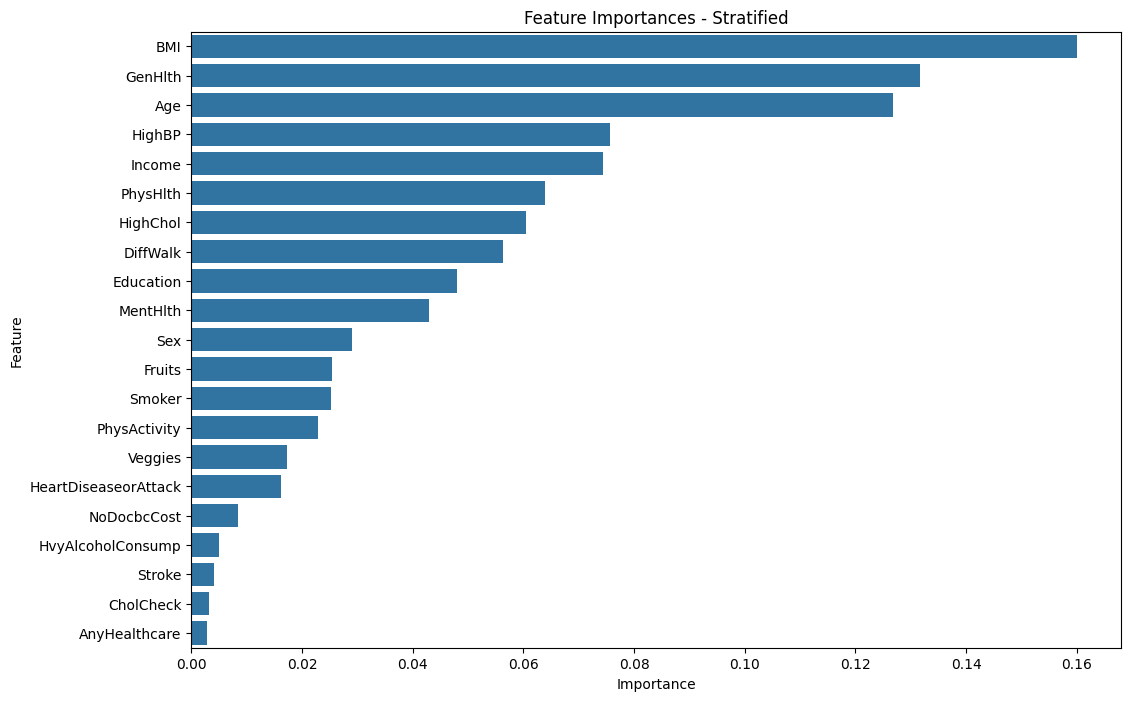

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = model7_1.feature_importances_

feature_names = X.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances - Stratified')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = [30, 50, 100]
best_f1 = 0
best_RF = None

for estimator in n_estimators:
    rf = RandomForestClassifier(
        n_estimators = estimator,
        criterion='gini',
        max_depth=10,
        min_samples_leaf=5,
        random_state=12345,
        verbose = 1
    ).fit(X=X_trn_over, y=y_trn_over)
    f1 = f1_score(y_val_over, rf.predict(X_val_over), average='macro')

    if f1 > best_f1:
        best_f1 = f1
        best_RF = rf

print("Best Hyperparameter: ", best_RF.get_params())
print("Best F1 Score: ", best_f1)

model7_2 = RandomForestClassifier(n_estimators=best_RF.n_estimators,
                             criterion=best_RF.criterion,
                             max_depth=best_RF.max_depth,
                             min_samples_leaf=best_RF.min_samples_leaf,
                             verbose=best_RF.verbose,
                             random_state=best_RF.random_state)
results7_2 = evaluate_model(model7_2, X_oversampled, y_oversampled)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Best Hyperparameter:  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 5, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 12345, 'verbose': 1, 'warm_start': False}
Best F1 Score:  0.5538573062527689


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s


F1-measure mean: 0.5537
F1-measure std: 0.0109
95% confidence interval for F1-measure: [0.5385, 0.5689]

Random State: 1, F1 Score: 0.5399
Confusion Matrix:
[[406 122 139]
 [170 263 234]
 [ 98 148 420]]

Random State: 12, F1 Score: 0.5497
Confusion Matrix:
[[438  83 146]
 [151 258 257]
 [114 138 415]]

Random State: 123, F1 Score: 0.5514
Confusion Matrix:
[[431 133 102]
 [167 281 219]
 [118 151 398]]

Random State: 1234, F1 Score: 0.5544
Confusion Matrix:
[[432 114 121]
 [158 280 228]
 [121 141 405]]

Random State: 12345, F1 Score: 0.5733
Confusion Matrix:
[[463  97 106]
 [151 277 239]
 [ 98 152 417]]


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


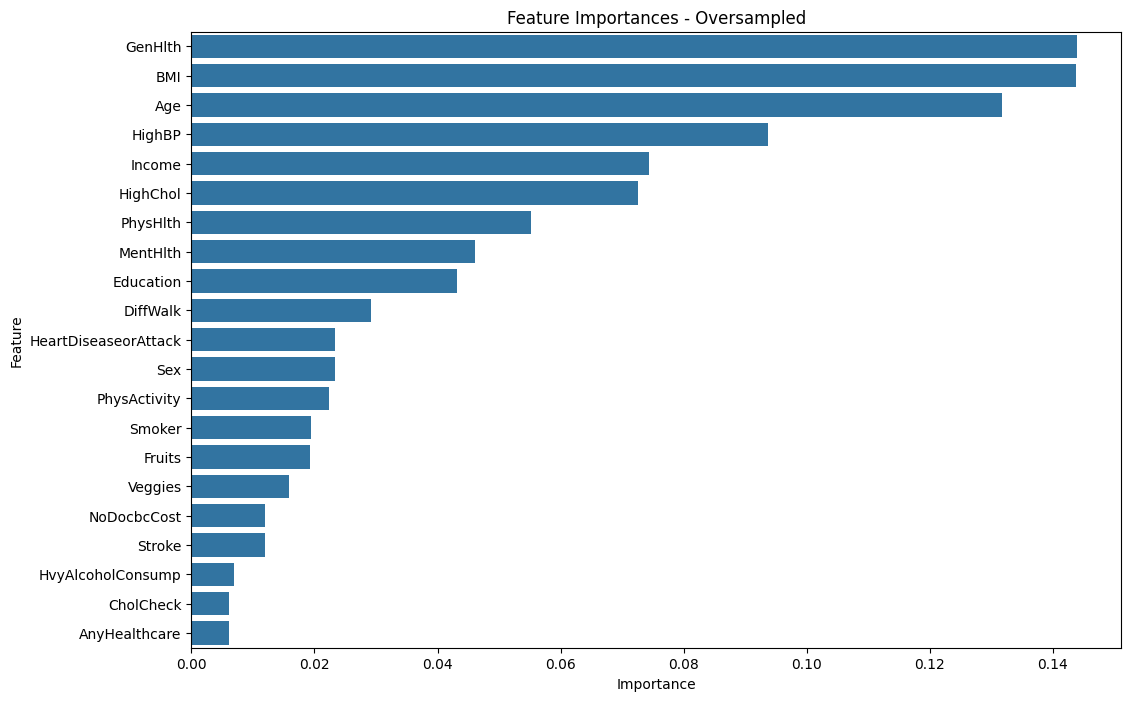

In [ ]:
feature_importances = model7_2.feature_importances_

feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances - Oversampled')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = [30, 50, 100]
best_f1 = 0
best_RF = None

for estimator in n_estimators:
    rf = RandomForestClassifier(
        n_estimators = estimator,
        criterion='gini',
        max_depth=20,
        min_samples_leaf=20,
        random_state=12345,
        verbose = 1
    ).fit(X=X_trn_smote, y=y_trn_smote)
    f1 = f1_score(y_val_smote, rf.predict(X_val_smote), average='macro')

    if f1 > best_f1:
        best_f1 = f1
        best_RF = rf

print("Best Hyperparameter: ", best_RF.get_params())
print("Best F1 Score: ", best_f1)

model7_3 = RandomForestClassifier(n_estimators=best_RF.n_estimators,
                             criterion=best_RF.criterion,
                             max_depth=best_RF.max_depth,
                             min_samples_leaf=best_RF.min_samples_leaf,
                             verbose=best_RF.verbose,
                             random_state=best_RF.random_state)
results7_3 = evaluate_model(model7_3, X_smotesampled, y_smotesampled)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Best Hyperparameter:  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 20, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 12345, 'verbose': 1, 'warm_start': False}
Best F1 Score:  0.6386841897771247


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.7s


F1-measure mean: 0.6465
F1-measure std: 0.0100
95% confidence interval for F1-measure: [0.6326, 0.6605]

Random State: 1, F1 Score: 0.6508
Confusion Matrix:
[[498  19 150]
 [110 396 161]
 [ 99 159 408]]

Random State: 12, F1 Score: 0.6376
Confusion Matrix:
[[514  23 130]
 [124 355 187]
 [ 92 164 411]]

Random State: 123, F1 Score: 0.6524
Confusion Matrix:
[[526  33 107]
 [101 379 187]
 [104 159 404]]

Random State: 1234, F1 Score: 0.6323
Confusion Matrix:
[[510  30 127]
 [122 371 173]
 [111 168 388]]

Random State: 12345, F1 Score: 0.6595
Confusion Matrix:
[[535  24 107]
 [ 82 403 182]
 [118 164 385]]


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


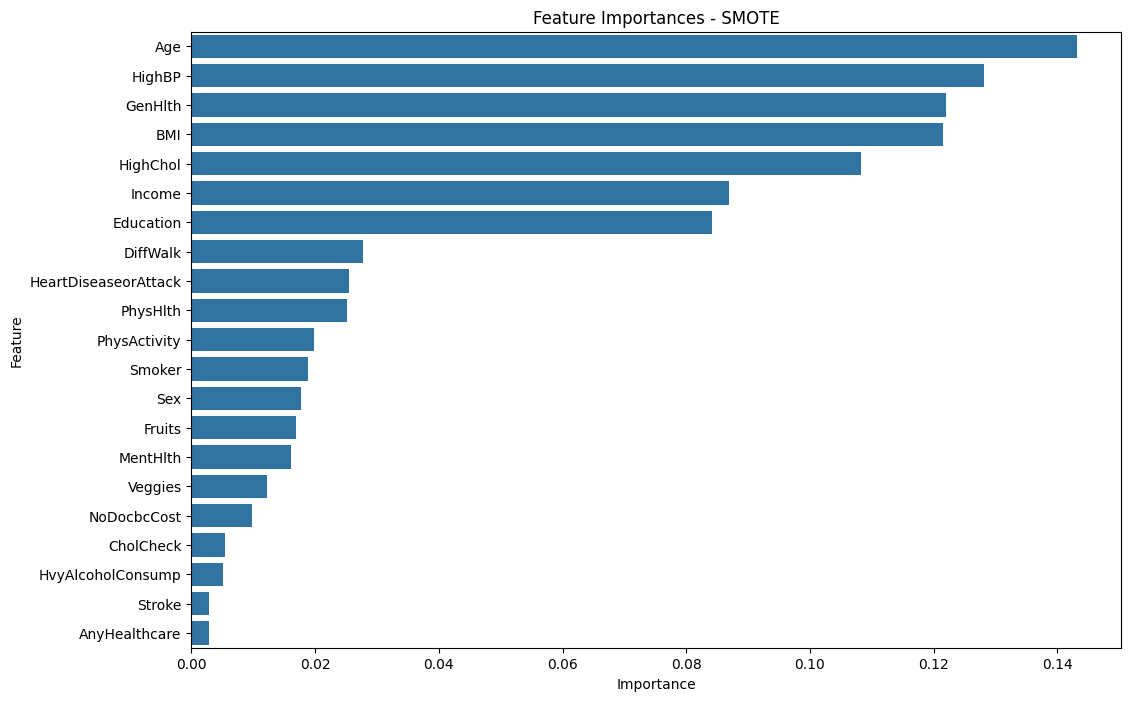

In [ ]:
feature_importances = model7_3.feature_importances_

feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances - SMOTE')
plt.show()

### Adaptive Boosting (AdaBoost)

In [ ]:
from sklearn.model_selection import ParameterGrid
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

n_estimators = [30, 50, 100]

param_grid = {
    'n_estimators': n_estimators,
}

best_f1 = 0
best_AdaBoost = None

for params in ParameterGrid(param_grid):
    adaboost_model = AdaBoostClassifier(**params,
                                        base_estimator=DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5, random_state=12345),
                                        random_state=12345)
    adaboost_model.fit(X_trn_data, y_trn_data)
    f1 = f1_score(y_val_data, adaboost_model.predict(X_val_data), average='macro')

    if f1 > best_f1:
        best_f1 = f1
        best_AdaBoost = adaboost_model

print("Best Hyperparameter: ", best_AdaBoost.get_params())
print("Best F1 Score: ", best_f1)

model9_1 = AdaBoostClassifier(n_estimators=best_AdaBoost.n_estimators,
                             random_state=best_AdaBoost.random_state)
results9_1 = evaluate_model(model9_1, X_scaled, y)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best Hyperparameter:  {'algorithm': 'SAMME.R', 'base_estimator__ccp_alpha': 0.0, 'base_estimator__class_weight': None, 'base_estimator__criterion': 'entropy', 'base_estimator__max_depth': 20, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_samples_leaf': 5, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__random_state': 12345, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,
                       random_state=12345), 'estimator': None, 'learning_rate': 1.0, 'n_estimators': 30, 'random_state': 12345}
Best F1 Score:  0.38208100909710524
F1-measure mean: 0.4094
F1-measure std: 0.0069
95% confidence interval for F1-measure: [0.3998, 0.4190]

Random State: 1, F1 Score: 0.4002
Confusion Matrix:
[[1622    0   63]
 [  36    0    1]
 [ 220    0   58]]

Random S

In [ ]:
from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import AdaBoostClassifier

n_estimators = [30, 50, 100]

param_grid = {
    'n_estimators': n_estimators,
}

best_f1 = 0
best_AdaBoost = None

for params in ParameterGrid(param_grid):
    adaboost_model = AdaBoostClassifier(**params,
                                        base_estimator=DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=20, random_state=12345),
                                        random_state=12345)
    adaboost_model.fit(X_trn_over, y_trn_over)
    f1 = f1_score(y_val_over, adaboost_model.predict(X_val_over), average='macro')

    if f1 > best_f1:
        best_f1 = f1
        best_AdaBoost = adaboost_model

print("Best Hyperparameter: ", best_AdaBoost.get_params())
print("Best F1 Score: ", best_f1)

model9_2 = AdaBoostClassifier(n_estimators=best_AdaBoost.n_estimators,
                             random_state=best_AdaBoost.random_state)
results9_2 = evaluate_model(model9_2, X_oversampled, y_oversampled)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best Hyperparameter:  {'algorithm': 'SAMME.R', 'base_estimator__ccp_alpha': 0.0, 'base_estimator__class_weight': None, 'base_estimator__criterion': 'entropy', 'base_estimator__max_depth': 10, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_samples_leaf': 20, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__random_state': 12345, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=20,
                       random_state=12345), 'estimator': None, 'learning_rate': 1.0, 'n_estimators': 100, 'random_state': 12345}
Best F1 Score:  0.5520423040749787
F1-measure mean: 0.5130
F1-measure std: 0.0098
95% confidence interval for F1-measure: [0.4993, 0.5266]

Random State: 1, F1 Score: 0.5176
Confusion Matrix:
[[414 118 135]
 [182 234 251]
 [120 145 401]]

Random State: 1

In [ ]:
from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import AdaBoostClassifier

n_estimators = [30, 50, 100]

param_grid = {
    'n_estimators': n_estimators,
}

best_f1 = 0
best_AdaBoost = None

for params in ParameterGrid(param_grid):
    adaboost_model = AdaBoostClassifier(**params,
                                        base_estimator=DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=5, random_state=12345),
                                        random_state=12345)
    adaboost_model.fit(X_trn_smote, y_trn_smote)
    f1 = f1_score(y_val_smote, adaboost_model.predict(X_val_smote), average='macro')

    if f1 > best_f1:
        best_f1 = f1
        best_AdaBoost = adaboost_model

print("Best Hyperparameter: ", best_AdaBoost.get_params())
print("Best F1 Score: ", best_f1)

model9_3 = AdaBoostClassifier(n_estimators=best_AdaBoost.n_estimators,
                             random_state=best_AdaBoost.random_state)
results9_3 = evaluate_model(model9_3, X_smotesampled, y_smotesampled)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best Hyperparameter:  {'algorithm': 'SAMME.R', 'base_estimator__ccp_alpha': 0.0, 'base_estimator__class_weight': None, 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 10, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_samples_leaf': 5, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__random_state': 12345, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=12345), 'estimator': None, 'learning_rate': 1.0, 'n_estimators': 100, 'random_state': 12345}
Best F1 Score:  0.6971573155907017
F1-measure mean: 0.6721
F1-measure std: 0.0086
95% confidence interval for F1-measure: [0.6602, 0.6841]

Random State: 1, F1 Score: 0.6714
Confusion Matrix:
[[504   2 161]
 [ 43 364 260]
 [ 68 130 468]]

Random State: 12, F1 Score: 0.6689
Confusion Matrix:
[[524   6 1

### Gradient Boosting Machine (GBM)

In [ ]:
from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import GradientBoostingClassifier

n_estimators = [30, 50, 100]
max_depth = [20]
min_samples_leaf = [5]
random_state = [12345]

param_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf,
    'random_state' : random_state
}

best_f1 = 0
best_GBM = None

for params in ParameterGrid(param_grid):
    gbm_model = GradientBoostingClassifier(**params)
    gbm_model.fit(X_trn_data, y_trn_data)
    f1 = f1_score(y_val_data, gbm_model.predict(X_val_data), average='macro')

    if f1 > best_f1:
        best_f1 = f1
        best_GBM = gbm_model

print("Best Hyperparameter: ", best_GBM.get_params())
print("Best F1 Score: ", best_f1)

model10_1 = GradientBoostingClassifier(n_estimators=best_GBM.n_estimators,
                             max_depth=best_GBM.max_depth,
                             min_samples_leaf=best_GBM.min_samples_leaf,
                             random_state=best_GBM.random_state)
results10_1 = evaluate_model(model10_1, X_scaled, y)

Best Hyperparameter:  {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 20, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 5, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_iter_no_change': None, 'random_state': 12345, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Best F1 Score:  0.39873242593580205
F1-measure mean: 0.4059
F1-measure std: 0.0073
95% confidence interval for F1-measure: [0.3958, 0.4159]

Random State: 1, F1 Score: 0.4014
Confusion Matrix:
[[1592    2   91]
 [  32    0    5]
 [ 212    0   66]]

Random State: 12, F1 Score: 0.4088
Confusion Matrix:
[[1591    4   90]
 [  34    0    3]
 [ 206    1   71]]

Random State: 123, F1 Score: 0.3939
Confusion Matrix:
[[1605    1   79]
 [  30    0    6]
 [ 220    1   58]]

Random State: 1234, F1 Score: 0.4121
Confusion Matrix:
[[1603    2  

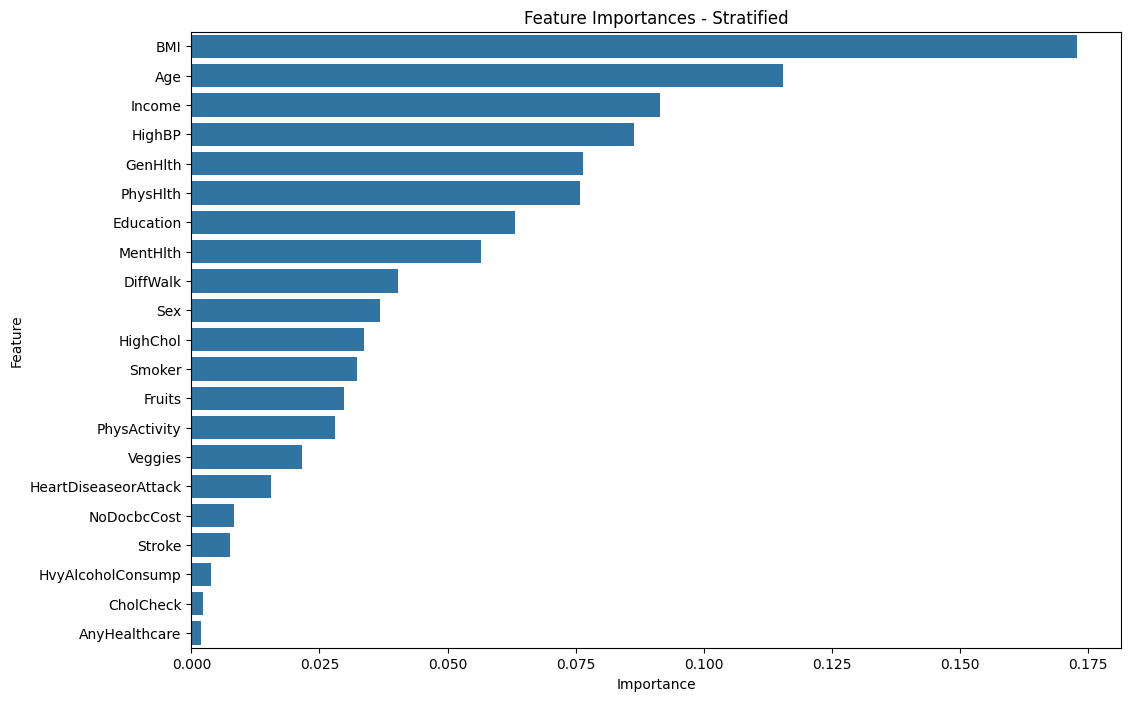

In [ ]:
feature_importances = model10_1.feature_importances_

feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances - Stratified')
plt.show()

In [ ]:
from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import GradientBoostingClassifier

n_estimators = [30, 50, 100]
max_depth = [10]
min_samples_leaf = [5]
random_state = [12345]

param_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf,
    'random_state' : random_state
}

best_f1 = 0
best_GBM = None

for params in ParameterGrid(param_grid):
    gbm_model = GradientBoostingClassifier(**params)
    gbm_model.fit(X_trn_over, y_trn_over)
    f1 = f1_score(y_val_over, gbm_model.predict(X_val_over), average='macro')

    if f1 > best_f1:
        best_f1 = f1
        best_GBM = gbm_model

print("Best Hyperparameter: ", best_GBM.get_params())
print("Best F1 Score: ", best_f1)

model10_2 = GradientBoostingClassifier(n_estimators=best_GBM.n_estimators,
                             max_depth=best_GBM.max_depth,
                             min_samples_leaf=best_GBM.min_samples_leaf,
                             random_state=best_GBM.random_state)
results10_2 = evaluate_model(model10_2, X_oversampled, y_oversampled)

Best Hyperparameter:  {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 5, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_iter_no_change': None, 'random_state': 12345, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Best F1 Score:  0.5951024937803523
F1-measure mean: 0.5878
F1-measure std: 0.0121
95% confidence interval for F1-measure: [0.5710, 0.6046]

Random State: 1, F1 Score: 0.5830
Confusion Matrix:
[[389 134 144]
 [115 388 164]
 [111 167 388]]

Random State: 12, F1 Score: 0.5948
Confusion Matrix:
[[412 115 140]
 [117 391 158]
 [116 165 386]]

Random State: 123, F1 Score: 0.5864
Confusion Matrix:
[[413 129 124]
 [114 377 176]
 [114 171 382]]

Random State: 1234, F1 Score: 0.5693
Confusion Matrix:
[[398 121 148]
 [123 373 170]
 [129 171 3

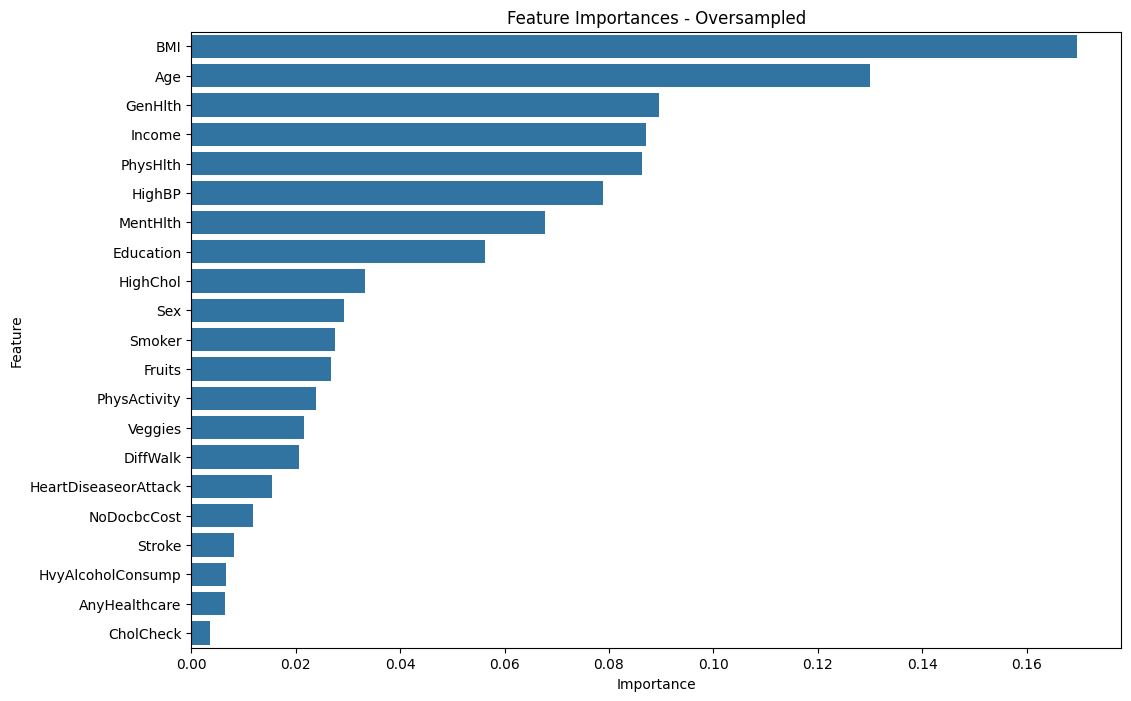

In [ ]:
feature_importances = model10_2.feature_importances_

feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances - Oversampled')
plt.show()

In [ ]:
from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import GradientBoostingClassifier

n_estimators = [30, 50, 100]
max_depth = [20]
min_samples_leaf = [20]
random_state = [12345]

param_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf,
    'random_state' : random_state
}

best_f1 = 0
best_GBM = None

for params in ParameterGrid(param_grid):
    gbm_model = GradientBoostingClassifier(**params)
    gbm_model.fit(X_trn_smote, y_trn_smote)
    f1 = f1_score(y_val_smote, gbm_model.predict(X_val_smote), average='macro')

    if f1 > best_f1:
        best_f1 = f1
        best_GBM = gbm_model

print("Best Hyperparameter: ", best_GBM.get_params())
print("Best F1 Score: ", best_f1)

model10_3 = GradientBoostingClassifier(n_estimators=best_GBM.n_estimators,
                             max_depth=best_GBM.max_depth,
                             min_samples_leaf=best_GBM.min_samples_leaf,
                             random_state=best_GBM.random_state)
results10_3 = evaluate_model(model10_3, X_smotesampled, y_smotesampled)

Best Hyperparameter:  {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 20, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 20, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 12345, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Best F1 Score:  0.7347520908513681
F1-measure mean: 0.7528
F1-measure std: 0.0044
95% confidence interval for F1-measure: [0.7466, 0.7590]

Random State: 1, F1 Score: 0.7553
Confusion Matrix:
[[606   1  60]
 [ 28 509 130]
 [ 84 179 403]]

Random State: 12, F1 Score: 0.7480
Confusion Matrix:
[[588   1  78]
 [ 24 503 139]
 [ 85 173 409]]

Random State: 123, F1 Score: 0.7589
Confusion Matrix:
[[609   1  56]
 [ 14 507 146]
 [ 91 168 408]]

Random State: 1234, F1 Score: 0.7544
Confusion Matrix:
[[591   1  75]
 [ 29 504 133]
 [ 84 165

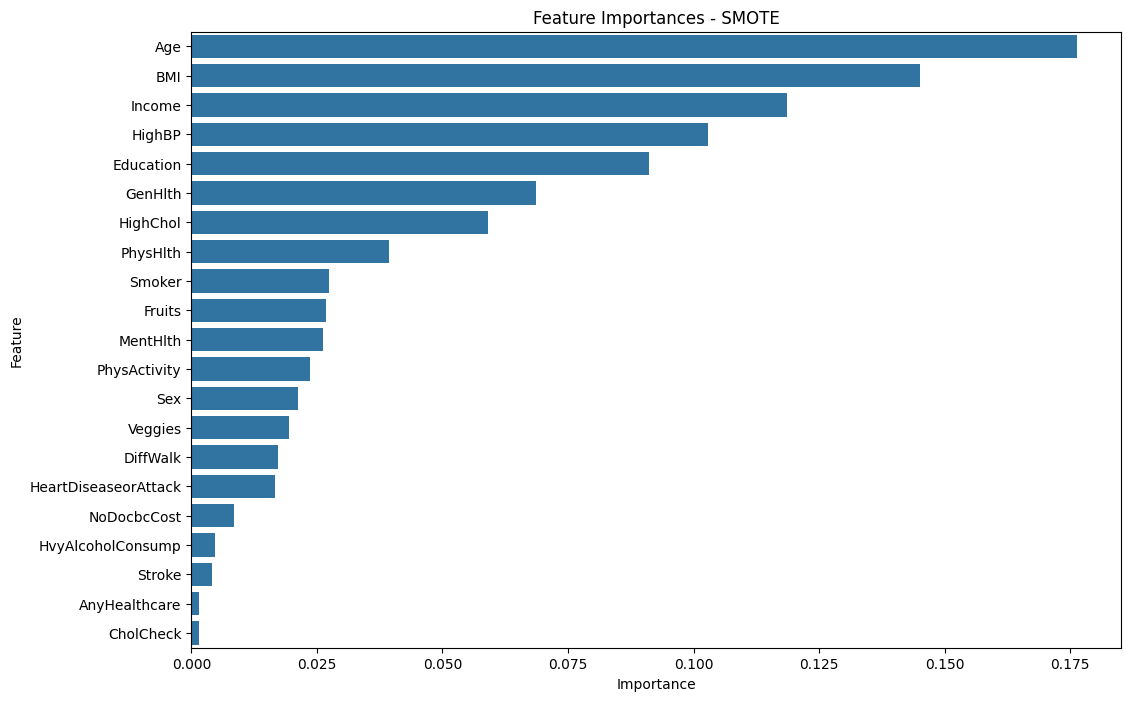

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = model10_3.feature_importances_

feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances - SMOTE')
plt.show()

In [ ]:
pred = model10_3.predict(X_test_smote)
f1 = f1_score(y_test_smote, pred, average='macro')
cm = confusion_matrix(y_test_smote, pred)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(cm)

F1 Score: 0.7222145875725888
Confusion Matrix:
[[596   1  70]
 [ 29 468 170]
 [101 178 387]]
